In [581]:
import matplotlib.pyplot as plt
import warnings
import matplotlib

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

# 마이너스 부호 설정
matplotlib.rcParams['axes.unicode_minus'] = False

# 경고 메시지 숨기기
warnings.filterwarnings('ignore')

In [582]:
import pandas as pd

df = pd.read_csv('이상치제거x.csv', encoding='cp949')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    163 non-null    int64  
 1   시군구           163 non-null    object 
 2   소멸지수          163 non-null    float64
 3   1인당 자동차 등록대수  163 non-null    float64
 4   고등학교          163 non-null    float64
 5   대규모C          163 non-null    int64  
 6   대규모W          163 non-null    int64  
 7   병상 비율         163 non-null    float64
 8   병원            163 non-null    int64  
 9   보건지소          163 non-null    int64  
 10  보육시설 비율       163 non-null    float64
 11  소규모C          163 non-null    int64  
 12  소규모W          163 non-null    int64  
 13  약국            163 non-null    int64  
 14  요양병원          163 non-null    int64  
 15  유치원           163 non-null    float64
 16  전규모W          163 non-null    int64  
 17  종합병원          163 non-null    int64  
 18  중규모C          163 non-null    

In [583]:
data = df[['소멸지수', '1인당 자동차 등록대수', '고등학교', '대규모C', '대규모W',
       '병상 비율', '병원', '보건지소', '보육시설 비율', '소규모C', '소규모W', '약국', '요양병원', '유치원',
       '전규모W', '종합병원', '중규모C', '중규모W', '중학교', '초등학교']]

In [584]:
data.head()

,소멸지수,1인당 자동차 등록대수,고등학교,대규모C,대규모W,병상 비율,병원,보건지소,보육시설 비율,소규모C,소규모W,약국,요양병원,유치원,전규모W,종합병원,중규모C,중규모W,중학교,초등학교
0,0.42,1.057511,17.92,2,1659,46.8,2,0,22.9,6175,28641,46,4,15.50,51999,1,264,21699,22.18,20.98
1,0.39,0.308169,18.80,5,8822,50.2,2,0,12.5,3363,14859,96,6,17.71,32792,2,137,9111,24.45,19.77
2,0.39,0.588482,18.20,6,4517,33.6,5,0,14.9,5231,25622,68,5,18.24,58075,3,365,27936,21.97,19.86
3,0.27,0.321076,17.92,3,3822,17.7,2,0,19.0,3730,17756,58,5,14.68,31976,2,126,10398,21.73,17.53
4,0.63,0.430672,18.77,16,12633,21.2,17,0,13.0,13675,65984,213,14,18.69,125964,3,631,47347,23.97,21.13


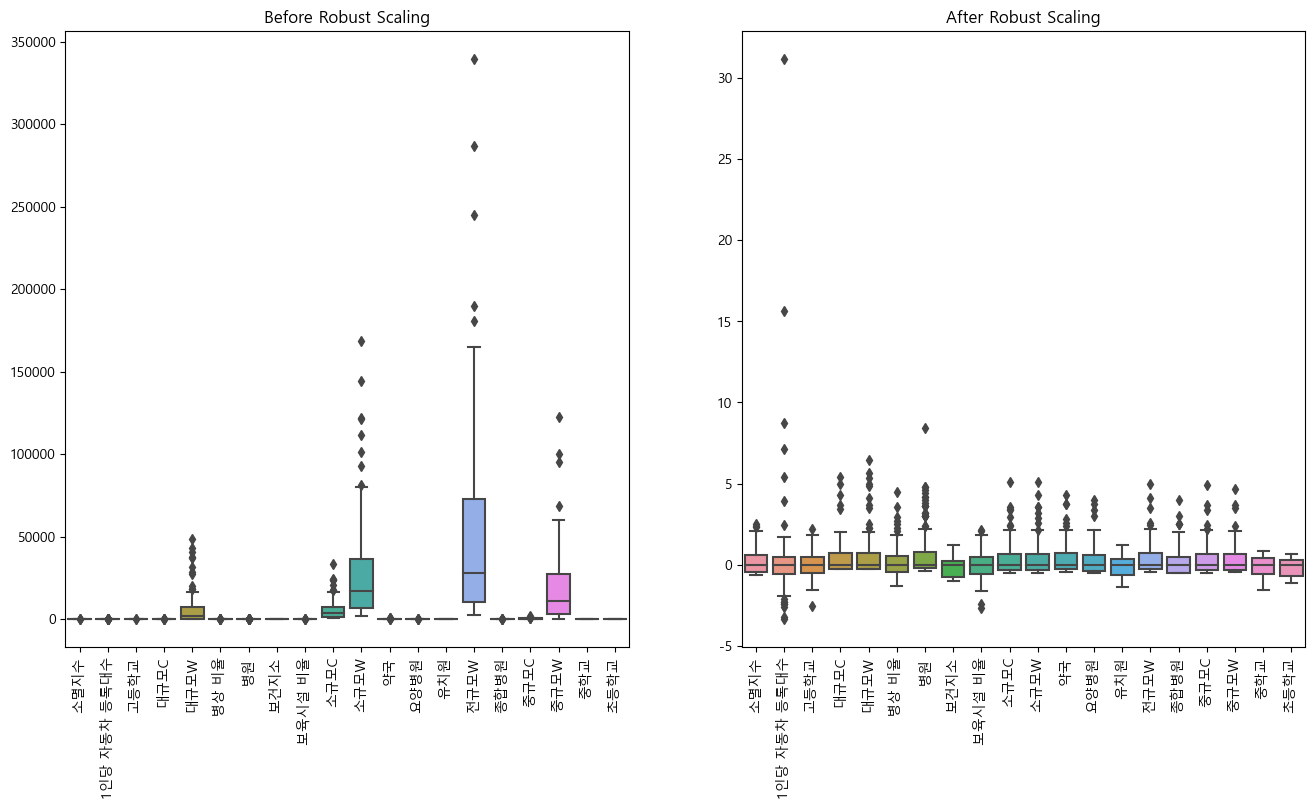

In [585]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler

# Robust Scaler 적용
scaler = RobustScaler()
scaled_data = scaler.fit_transform(data_features)
scaled_df = pd.DataFrame(scaled_data, columns=data_features.columns)

# 정규화 전후 데이터 비교 박스 플롯
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
sns.boxplot(data=data_features, ax=axes[0])
axes[0].set_title('Before Robust Scaling')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)

sns.boxplot(data=scaled_df, ax=axes[1])
axes[1].set_title('After Robust Scaling')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)

plt.show()

In [586]:
scaled_df

,소멸지수,1인당 자동차 등록대수,고등학교,대규모C,대규모W,병상 비율,병원,보건지소,보육시설 비율,소규모C,소규모W,약국,요양병원,유치원,전규모W,종합병원,중규모C,중규모W,중학교,초등학교
0,0.281690,5.425024,-0.418704,0.000000,-0.029754,2.677966,0.0,-1.000,1.302326,0.476287,0.399099,0.022099,0.000,0.244635,0.382438,0.0,0.371336,0.451469,0.149642,0.385302
1,0.197183,-3.335382,-0.231668,0.428571,0.961528,2.966102,0.0,-1.000,-1.116279,0.000000,-0.067668,0.574586,0.250,0.560801,0.074722,0.5,-0.042345,-0.072125,0.445023,0.258268
2,0.197183,-0.058299,-0.359192,0.571429,0.365763,1.559322,0.6,-1.000,-0.558140,0.316396,0.296852,0.265193,0.125,0.636624,0.479781,1.0,0.700326,0.710896,0.122316,0.267717
3,-0.140845,-3.184489,-0.418704,0.142857,0.269582,0.211864,0.0,-1.000,0.395349,0.062161,0.030447,0.154696,0.125,0.127325,0.061649,0.5,-0.078176,-0.018593,0.091087,0.023097
4,0.873239,-1.903224,-0.238045,2.000000,1.488929,0.508475,3.0,-1.000,-1.000000,1.746612,1.663827,1.867403,1.250,0.701001,1.567432,1.0,1.566775,1.518291,0.382563,0.401050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,-0.253521,-0.016940,-0.061637,-0.285714,-0.259341,-0.127119,0.2,0.375,0.000000,-0.254404,-0.257802,-0.121547,-0.125,-0.165951,-0.226681,-0.5,-0.218241,-0.254185,0.000000,-0.250919
159,-0.591549,0.257438,-1.198725,-0.285714,-0.259341,0.330508,-0.2,1.000,-0.511628,-0.373645,-0.365434,-0.298343,-0.250,-0.678112,-0.306915,-0.5,-0.302932,-0.330304,-0.951204,-0.960630
160,1.070423,7.158471,1.349628,0.857143,1.069610,-0.491525,0.6,-0.250,-0.255814,2.958672,2.867763,2.165746,0.875,0.952790,2.031738,2.0,1.521173,1.471414,0.623292,0.509186
161,0.309859,0.095664,0.663124,0.142857,0.736092,-1.033898,0.2,-0.375,0.139535,0.573509,0.491965,0.331492,-0.500,0.135908,0.319667,0.0,0.156352,0.143211,0.426805,0.122835


In [587]:
scaled_df = scaled_df[['1인당 자동차 등록대수', '고등학교', '대규모C', '대규모W',
       '병상 비율', '병원', '보건지소', '보육시설 비율', '소규모C', '소규모W', '약국', '요양병원', '유치원',
       '전규모W', '종합병원', '중규모C', '중규모W', '중학교', '초등학교','소멸지수']]

scaled_df.columns[:-1].tolist()

['1인당 자동차 등록대수',
 '고등학교',
 '대규모C',
 '대규모W',
 '병상 비율',
 '병원',
 '보건지소',
 '보육시설 비율',
 '소규모C',
 '소규모W',
 '약국',
 '요양병원',
 '유치원',
 '전규모W',
 '종합병원',
 '중규모C',
 '중규모W',
 '중학교',
 '초등학교']

In [588]:
scaled_df

,1인당 자동차 등록대수,고등학교,대규모C,대규모W,병상 비율,병원,보건지소,보육시설 비율,소규모C,소규모W,약국,요양병원,유치원,전규모W,종합병원,중규모C,중규모W,중학교,초등학교,소멸지수
0,5.425024,-0.418704,0.000000,-0.029754,2.677966,0.0,-1.000,1.302326,0.476287,0.399099,0.022099,0.000,0.244635,0.382438,0.0,0.371336,0.451469,0.149642,0.385302,0.281690
1,-3.335382,-0.231668,0.428571,0.961528,2.966102,0.0,-1.000,-1.116279,0.000000,-0.067668,0.574586,0.250,0.560801,0.074722,0.5,-0.042345,-0.072125,0.445023,0.258268,0.197183
2,-0.058299,-0.359192,0.571429,0.365763,1.559322,0.6,-1.000,-0.558140,0.316396,0.296852,0.265193,0.125,0.636624,0.479781,1.0,0.700326,0.710896,0.122316,0.267717,0.197183
3,-3.184489,-0.418704,0.142857,0.269582,0.211864,0.0,-1.000,0.395349,0.062161,0.030447,0.154696,0.125,0.127325,0.061649,0.5,-0.078176,-0.018593,0.091087,0.023097,-0.140845
4,-1.903224,-0.238045,2.000000,1.488929,0.508475,3.0,-1.000,-1.000000,1.746612,1.663827,1.867403,1.250,0.701001,1.567432,1.0,1.566775,1.518291,0.382563,0.401050,0.873239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,-0.016940,-0.061637,-0.285714,-0.259341,-0.127119,0.2,0.375,0.000000,-0.254404,-0.257802,-0.121547,-0.125,-0.165951,-0.226681,-0.5,-0.218241,-0.254185,0.000000,-0.250919,-0.253521
159,0.257438,-1.198725,-0.285714,-0.259341,0.330508,-0.2,1.000,-0.511628,-0.373645,-0.365434,-0.298343,-0.250,-0.678112,-0.306915,-0.5,-0.302932,-0.330304,-0.951204,-0.960630,-0.591549
160,7.158471,1.349628,0.857143,1.069610,-0.491525,0.6,-0.250,-0.255814,2.958672,2.867763,2.165746,0.875,0.952790,2.031738,2.0,1.521173,1.471414,0.623292,0.509186,1.070423
161,0.095664,0.663124,0.142857,0.736092,-1.033898,0.2,-0.375,0.139535,0.573509,0.491965,0.331492,-0.500,0.135908,0.319667,0.0,0.156352,0.143211,0.426805,0.122835,0.309859


In [589]:
## 전진 단계별 선택법
variables = scaled_df.columns[:-1].tolist() ## 설명 변수 리스트
 
y = scaled_df['소멸지수'] ## 반응 변수
selected_variables = [] ## 선택된 변수들
sl_enter = 0.05
sl_remove = 0.05
 
sv_per_step = [] ## 각 스텝별로 선택된 변수들
adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
steps = [] ## 스텝
step = 0
while len(variables) > 0:
    remainder = list(set(variables) - set(selected_variables))
    pval = pd.Series(index=remainder) ## 변수의 p-value
    ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
    ## 선형 모형을 적합한다.
    for col in remainder: 
        X = df[selected_variables+[col]]
        X = sm.add_constant(X)
        model = sm.OLS(y,X).fit()
        pval[col] = model.pvalues[col]
 
    min_pval = pval.min()
    if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
        selected_variables.append(pval.idxmin())
        ## 선택된 변수들에대해서
        ## 어떤 변수를 제거할지 고른다.
        while len(selected_variables) > 0:
            selected_X = df[selected_variables]
            selected_X = sm.add_constant(selected_X)
            selected_pval = sm.OLS(y,selected_X).fit().pvalues[1:] ## 절편항의 p-value는 뺀다
            max_pval = selected_pval.max()
            if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
                remove_variable = selected_pval.idxmax()
                selected_variables.remove(remove_variable)
            else:
                break
        
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(scaled_df[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break

In [590]:
selected_variables

['초등학교', '대규모W', '소규모C', '요양병원', '보건지소', '고등학교']

In [591]:
selected_df = scaled_df[['초등학교', '대규모W', '소규모C', '요양병원', '보건지소', '고등학교','소멸지수']]

In [592]:
X = scaled_df.drop(columns=['소멸지수'])  # 설명 변수
y = scaled_df['소멸지수']  # 반응 변수

# 모든 설명 변수에 대해 VIF 계산
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# OLS 모델 적합 및 p-value 계산
X = sm.add_constant(X)  # 상수항 추가
model = sm.OLS(y, X).fit()
p_values = model.pvalues[1:]  # 상수항 제외한 설명 변수의 p-value

# 결과 출력
print("VIF:")
print(vif_data)
print("\nModel p-values:")
print(p_values)

VIF:
        Variable         VIF
0   1인당 자동차 등록대수    1.235925
1           고등학교    3.069133
2           대규모C   10.182595
3           대규모W    8.132019
4          병상 비율    1.387002
5             병원    7.434753
6           보건지소    1.819844
7        보육시설 비율    1.204297
8           소규모C   11.942217
9           소규모W   52.368369
10            약국   13.991491
11          요양병원    5.415537
12           유치원    7.664191
13          전규모W   69.387652
14          종합병원    3.091292
15          중규모C  307.714894
16          중규모W  207.418230
17           중학교    6.774609
18          초등학교   12.561002

Model p-values:
1인당 자동차 등록대수    0.753056
고등학교            0.005364
대규모C            0.213696
대규모W            0.026158
병상 비율           0.766870
병원              0.320284
보건지소            0.054380
보육시설 비율         0.301955
소규모C            0.004287
소규모W            0.016057
약국              0.045137
요양병원            0.041558
유치원             0.764018
전규모W            0.246746
종합병원            0.901875
중규모C            0.00001

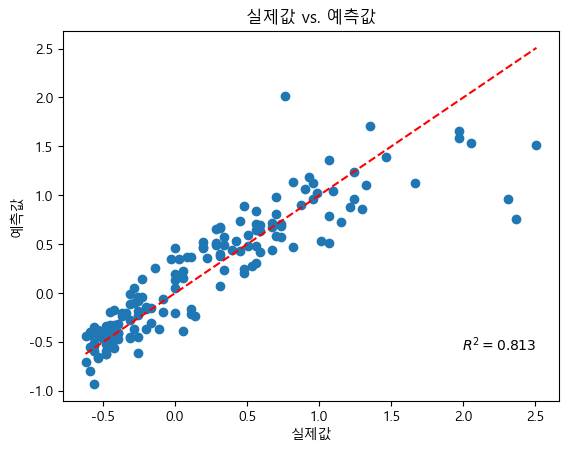

In [593]:
X = selected_df.drop(columns=['소멸지수'])  # 설명 변수
y = selected_df['소멸지수']  # 반응 변수

X = sm.add_constant(X)  # 상수항 추가
model = sm.OLS(y, X).fit()
y_pred = model.predict(X)

import matplotlib.pyplot as plt
import numpy as np


plt.scatter(y, y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.xlabel('실제값')
plt.ylabel('예측값')
plt.title('실제값 vs. 예측값')
plt.text(y.max(), y.min(), r'$R^2 = 0.813$', verticalalignment='bottom', horizontalalignment='right')
plt.show()

In [594]:
from sklearn.metrics import  mean_squared_error

mse = mean_squared_error(y, y_pred)
rmse = mse ** 0.5
rmse

0.2982200491554987

Text(0.5, 1.0, '잔차 그래프')

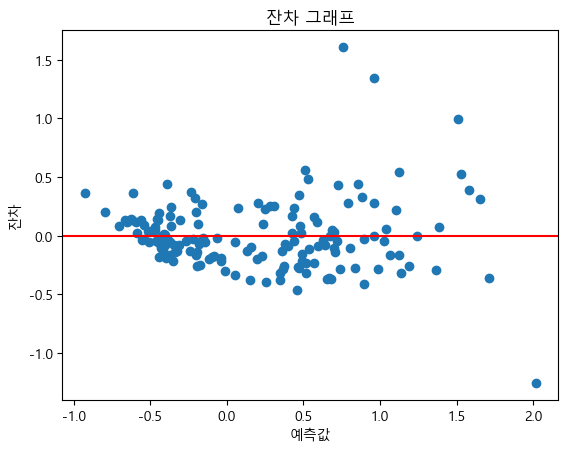

In [595]:
# 잔차 그래프

residuals = y - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('예측값')
plt.ylabel('잔차')
plt.title('잔차 그래프')

In [596]:
# from sklearn.linear_model import Ridge
# from sklearn.model_selection import GridSearchCV

# ridge = Ridge()
# params = {'alpha': [0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
# gridsearch = GridSearchCV(ridge, param_grid=params, scoring='r2')
# gridsearch.fit(X, y)

# # 각 알파 값에 대한 R² 값을 출력
# for alpha, r2_score in zip(gridsearch.cv_results_['param_alpha'], gridsearch.cv_results_['mean_test_score']):
#     print("Alpha:", alpha, "R²:", r2_score)

# ridge_estimator = gridsearch.best_estimator_
# y_pred = ridge_estimator.predict(X)

# print(gridsearch.best_params_)
# print(ridge_estimator.score(X, y))

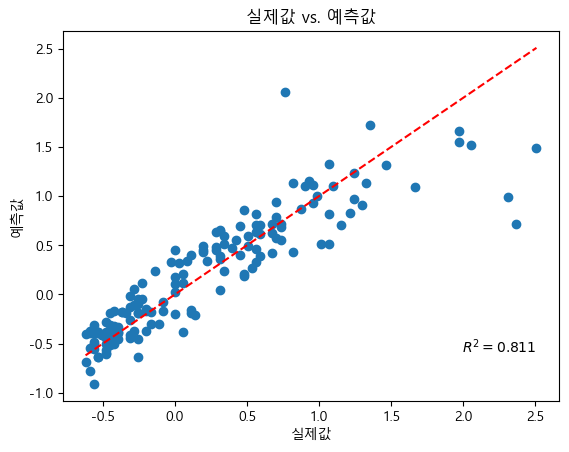

In [597]:
from sklearn.linear_model import Ridge
import numpy as np
import matplotlib.pyplot as plt

# Ridge 회귀 모델 생성
ridge = Ridge(alpha=3)  # 최적의 alpha 값 사용

# 모델 훈련
ridge.fit(X, y)

# 예측값 계산
y_pred = ridge.predict(X)


# 실제값 vs. 예측값 그래프

plt.scatter(y, y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.xlabel('실제값')
plt.ylabel('예측값')
plt.title('실제값 vs. 예측값')
plt.text(y.max(), y.min(), r'$R^2 = 0.811$', verticalalignment='bottom', horizontalalignment='right')
plt.show()

In [598]:
mse = mean_squared_error(y, y_pred)
rmse = mse ** 0.5
rmse

0.2993916113962742

Text(0.5, 1.0, '잔차 그래프')

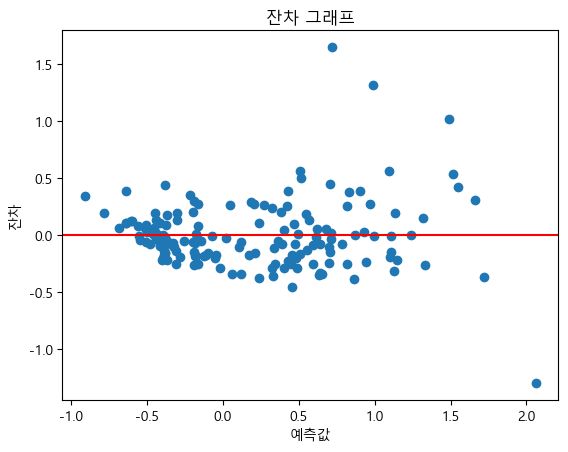

In [599]:
residuals = y - y_pred


plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('예측값')
plt.ylabel('잔차')
plt.title('잔차 그래프')

In [600]:
r_squared = ridge.score(X, y)
print("R-squared:", r_squared)

R-squared: 0.8115714737149946


In [601]:
df = pd.read_csv('C:/Users/hmins/Desktop/12341234.csv', encoding='utf-8')
df

,V1,병원,보건지소,약국,요양병원,종합병원,병상비율,1인당 자동차 등록대수,소규모C,중규모C,...,전규모W,보육시설비율,유치원,초등학교,중학교,고등학교,소멸지수,PC1,PC2,PC3
0,0,0.0,-1.000,0,0.000,0.0,3,5,0,0,...,0,1,0,0,0,0,0.281690,-0.73231,0.96325,1.96670
1,1,0.0,-1.000,1,0.250,0.5,3,-3,0,0,...,0,-1,1,0,0,0,0.197183,-0.82575,1.20628,2.18954
2,2,0.6,-1.000,0,0.125,1.0,2,0,0,1,...,0,-1,1,0,0,0,0.197183,-0.29599,0.89382,1.25848
3,3,0.0,-1.000,0,0.125,0.5,0,-3,0,0,...,0,0,0,0,0,0,-0.140845,-0.64547,0.72948,0.31310
4,4,3.0,-1.000,2,1.250,1.0,1,-2,2,2,...,2,-1,1,0,0,0,0.873239,1.32763,0.54747,0.57074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,158,0.2,0.375,0,-0.125,-0.5,0,0,0,0,...,0,0,0,0,0,0,-0.253521,-0.59118,-0.08175,-0.13250
159,159,-0.2,1.000,0,-0.250,-0.5,0,0,0,0,...,0,-1,-1,-1,-1,-1,-0.591549,-0.18913,-1.84486,0.26829
160,160,0.6,-0.250,2,0.875,2.0,0,7,3,2,...,2,0,1,1,1,1,1.070423,1.43100,1.06017,-0.27050
161,161,0.2,-0.375,0,-0.500,0.0,-1,0,1,0,...,0,0,0,0,0,1,0.309859,-0.31542,1.03055,-1.32904


In [602]:
df.columns

Index(['V1', '병원', '보건지소', '약국', '요양병원', '종합병원', '병상비율', '1인당 자동차 등록대수',
       '소규모C', '중규모C', '대규모C', '소규모W', '중규모W', '대규모W', '전규모W', '보육시설비율', '유치원',
       '초등학교', '중학교', '고등학교', '소멸지수', 'PC1', 'PC2', 'PC3'],
      dtype='object')

In [603]:
selected_df = df[['보건지소' ,'요양병원',
        '소규모C', '대규모W',
     '초등학교', '고등학교', '소멸지수', 'PC1', 'PC2', 'PC3']]

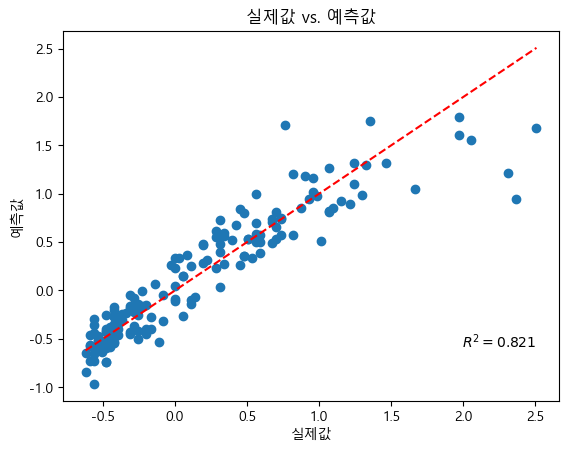

In [604]:
X = selected_df.drop(columns=['소멸지수'])  # 설명 변수
y = selected_df['소멸지수']  # 반응 변수

model = sm.OLS(y, X).fit()
y_pred = model.predict(X)

import matplotlib.pyplot as plt
import numpy as np


plt.scatter(y, y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.xlabel('실제값')
plt.ylabel('예측값')
plt.title('실제값 vs. 예측값')
plt.text(y.max(), y.min(), r'$R^2 = 0.821$', verticalalignment='bottom', horizontalalignment='right')
plt.show()

In [605]:
mse = mean_squared_error(y, y_pred)
rmse = mse ** 0.5
rmse

0.2601243795063364

In [606]:
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [607]:
vif_data

,Variable,VIF
0,보건지소,3.639208
1,요양병원,6.772467
2,소규모C,4.321728
3,대규모W,3.144410
4,초등학교,3.872676
5,고등학교,2.961133
6,PC1,7.348285
7,PC2,9.688676
8,PC3,2.569841
